In [4]:
import iris
import iris.plot as iplt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cx = iris.Constraint(longitude=lambda x: 160<=x<=200)
cy = iris.Constraint(latitude=lambda x: -20<=x<=20)
ct = iris.Constraint(time = lambda t:( t.point.year==2014 and t.point.month==1 ) or( t.point.year ==2013 and t.point.month==12 and t.point.day==31))
CMIP_N = iris.load("/g/data/oi10/replicas/CMIP6/CMIP/NCC/NorESM2-MM/historical/r1i1p1f1/6hrPlev/psl/gn/v20191108/psl_6hrPlev_NorESM2-MM_historical_r1i1p1f1_gn_201001010300-201412312100.nc",cx&cy&ct)
BARPA_N = iris.load("/g/data/tp28/dev/barpa/trials/chs548/cg282_norESM_debug/20140101T0000Z/nc/SLV15M/mslp*-v1-20140*",cx&cy)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'psl'
  warnings.warn(


In [9]:
aw_cn = iris.analysis.cartography.area_weights(CMIP_N[0])
BARPA_N.coord('longitude').guess_bounds()
BARPA_N.coord('latitude').guess_bounds()
aw_bn = iris.analysis.cartography.area_weights(BARPA_N)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [8]:
iris.util.equalise_attributes(BARPA_N)
BARPA_N = iris.cube.CubeList([cube[::] for cube in BARPA_N])
BARPA_N=BARPA_N.concatenate_cube()

In [11]:
BARPA,CMIP

(<iris 'Cube' of air_pressure_at_sea_level / (Pa) (time: 248; latitude: 229; longitude: 259)>,
 [<iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (time: 124; latitude: 44; longitude: 33)>])

NameError: name 'plt' is not defined

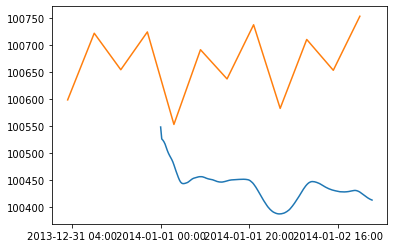

In [10]:
iplt.plot(BARPA_N[:8*24].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_bn[:8*24]))
iplt.plot(CMIP_N[0][:12].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_cn[:12]))
plt.grid()

NameError: name 'plt' is not defined

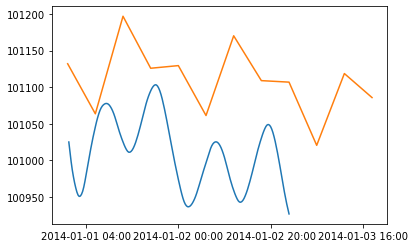

In [5]:
iplt.plot(BARPA[:8*24].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_b[:8*24]))
iplt.plot(CMIP[0][:12].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_c[:12]))
plt.grid()

In [55]:
CMIP_pr = iris.load("/g/data/oi10/replicas/CMIP6/CMIP/NCC/NorESM2-MM/historical/r1i1p1f1/day/pr/gn/*/*2010*",cx&cy&ct)
BARPA_pr = iris.load("/g/data/tp28/dev/barpa/prod/chs548/cg282_NorESM2-MM_ssp370_2014_sciB/20140101T0000Z/nc/SLV1H/av_prcp_rate-CMIP6-NorESM2-MM-ssp370-r1i1p1f1-barpa_r-v1-20140*",cx&cy)

In [65]:
CMIP_pr_A = iris.load("/g/data/fs38/publications/CMIP6/CMIP/CSIRO*/ACCESS-CM2/historical/r4i1p1f1/day/pr/gn/latest/*2000*",cx&cy&ct)
BARPA_pr_A = iris.load("/g/data/tp28/dev/barpa/prod/eh6215/cg282_ACCESS-CM2_ssp370_2014_sciB/20140101T0000Z/nc/SLV1H/av_prcp_rate-CMIP6-*-barpa_r-v1-20140*",cx&cy)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'pr'
  warnings.warn(


In [56]:
iris.util.equalise_attributes(BARPA_pr)
#BARPA_pr = iris.cube.CubeList([cube[::12] for cube in BARPA_pr])
BARPA_pr=BARPA_pr.concatenate_cube()
aw_cn = iris.analysis.cartography.area_weights(CMIP_pr[0])
BARPA_pr.coord('longitude').guess_bounds()
BARPA_pr.coord('latitude').guess_bounds()
aw_bn = iris.analysis.cartography.area_weights(BARPA_pr)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [66]:
iris.util.equalise_attributes(BARPA_pr_A)
#BARPA_pr = iris.cube.CubeList([cube[::12] for cube in BARPA_pr])
BARPA_pr_A=BARPA_pr_A.concatenate_cube()
aw_cn_A = iris.analysis.cartography.area_weights(CMIP_pr_A[0])
BARPA_pr_A.coord('longitude').guess_bounds()
BARPA_pr_A.coord('latitude').guess_bounds()
aw_bn_A = iris.analysis.cartography.area_weights(BARPA_pr_A)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [2]:
cx = iris.Constraint(longitude=lambda x: 160<=x<=200)
cy = iris.Constraint(latitude=lambda x: -20<=x<=20)
ct = iris.Constraint(time = lambda t: t.point.year==2014 and t.point.month==1)
CMIP = iris.load("/g/data/fs38/publications/CMIP6/CMIP/CSIRO*/ACCESS-CM2/historical/r4i1p1f1/6hrPlevPt/psl/gn/latest/psl_6hrPlev*_20100101*.nc",cx&cy&ct)
BARPA = iris.load("/g/data/tp28/dev/barpa/prod/eh6215/cg282_ACCESS-CM2_ssp370*/20140101T0000Z/nc/SLV15M/mslp-CMIP6-*-ssp370-r4i1p1f1-barpa_r-v1-20140*0015-*",cx&cy)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'psl'
  warnings.warn(


In [3]:
iris.util.equalise_attributes(BARPA)
BARPA = iris.cube.CubeList([cube[::] for cube in BARPA])
BARPA=BARPA.concatenate_cube()

In [4]:
aw_c = iris.analysis.cartography.area_weights(CMIP[0])
BARPA.coord('longitude').guess_bounds()
BARPA.coord('latitude').guess_bounds()
aw_b = iris.analysis.cartography.area_weights(BARPA)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


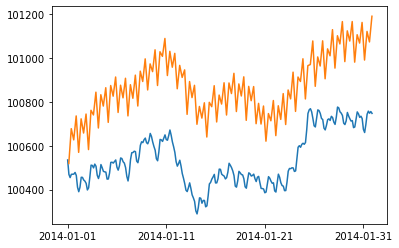

In [60]:
#iplt.plot(BARPA.collapsed(['longitude','latitude'],iris.analysis.PERCENTILE,percent=50))#,weights=aw_b))
#iplt.plot(CMIP[0].collapsed(['longitude','latitude'],iris.analysis.PERCENTILE,percent=50))#.MEAN,weights=aw_c))
iplt.plot(BARPA_N.collapsed(['longitude','latitude'],iris.analysis.PERCENTILE,percent=50))#.MEAN,weights=aw_bn))
iplt.plot(CMIP_N[0].collapsed(['longitude','latitude'],iris.analysis.PERCENTILE,percent=50))#.MEAN,weights=aw_cn))


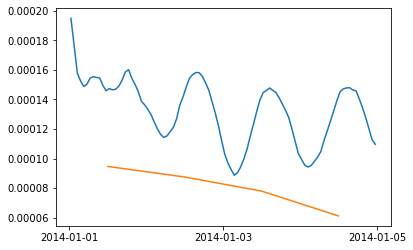

In [61]:
iplt.plot(BARPA_pr.collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_bn)[:4*24])
iplt.plot(CMIP_pr[0].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_cn)[:4])

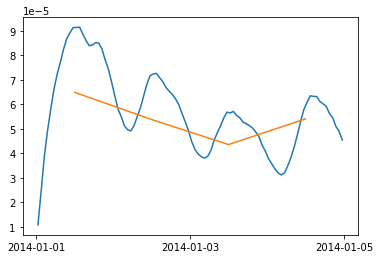

In [67]:
iplt.plot(BARPA_pr_A.collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_bn_A)[:4*24])
iplt.plot(CMIP_pr_A[0].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_cn_A)[:4])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/cube.py:3523: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))


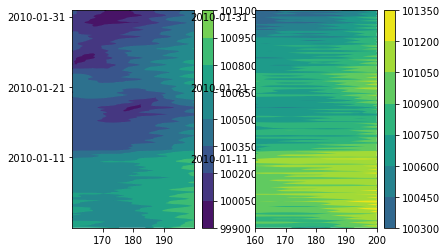

In [105]:
plt.subplot(121)
iplt.contourf(BARPA_N[:].collapsed(['latitude'],iris.analysis.MEAN),vmin=99900,vmax=101320)#.MEAN,weights=aw_bn))
plt.colorbar()
plt.subplot(122)
iplt.contourf(CMIP_N[0][:].collapsed(['latitude'],iris.analysis.MEAN),vmin=99900,vmax=101320)#.MEAN,weights=aw_cn))
plt.colorbar()

In [69]:
import matplotlib.pyplot as plt


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/cube.py:3523: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'time' is not bounded, guessing contiguous bounds.
  warnings.warn(


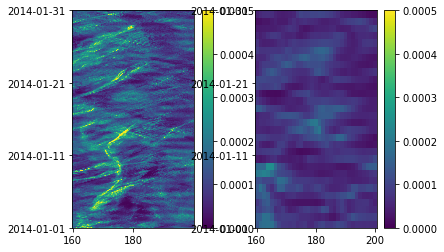

In [87]:
plt.subplot(121)
iplt.pcolormesh(BARPA_pr[:30*24].collapsed(['latitude'],iris.analysis.MEAN),vmin=0,vmax=0.0005)#,vmin=100200,vmax=101350)#.MEAN,weights=aw_bn))
plt.colorbar()
plt.subplot(122)
iplt.pcolormesh(CMIP_pr[0][:30].collapsed(['latitude'],iris.analysis.MEAN),vmin=0,vmax=0.0005)#,vmin=100200,vmax=101350)#.MEAN,weights=aw_cn))
plt.colorbar()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/cube.py:3523: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'time' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/cube.py:3523: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))


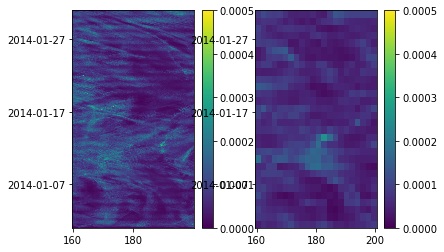

In [86]:
plt.subplot(121)
iplt.pcolormesh(BARPA_pr_A[:30*24].collapsed(['latitude'],iris.analysis.MEAN),vmin=0,vmax=0.0005)#,vmin=100200,vmax=101350)#.MEAN,weights=aw_bn))
plt.colorbar()
plt.subplot(122)
iplt.pcolormesh(CMIP_pr_A[0][:30].collapsed(['latitude'],iris.analysis.MEAN),vmin=0,vmax=0.0005)#,vmin=100200,vmax=101350)#.MEAN,weights=aw_cn))
plt.colorbar()

In [22]:
cx = iris.Constraint(longitude=lambda x: 160<=x<=200)
cy = iris.Constraint(latitude=lambda x: -20<=x<=20)
ct = iris.Constraint(time = lambda t:( t.point.year==2016 and t.point.month==1 and t.point.day==1) or( t.point.year ==2015 and t.point.month==12 and t.point.day==31))
CMIP = iris.load("/g/data/oi10/replicas/CMIP6/ScenarioMIP/NCC/NorESM2-MM/ssp370/r1i1p1f1/6hrPlev/psl/gn/*/psl_6hrPlev_NorESM2-MM_ssp370_r1i1p1f1_gn_2015*.nc",cx&cy&ct)

#barpa = iris.load("/home/548/eh6215/cylc-run/cg282_NorESM2_2010/share/cycle/20160101T0000Z/um/barpara_slv15m_20160101_00",'air_pressure_at_sea_level')
aw_cn = iris.analysis.cartography.area_weights(CMIP[0])
#BARPA[0].coord('longitude').guess_bounds()
#BARPA[0].coord('latitude').guess_bounds()
#aw_bn = iris.analysis.cartography.area_weights(BARPA[0])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'psl'
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:874: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


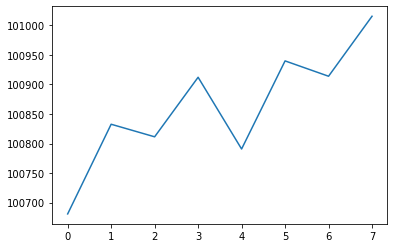

In [28]:
iplt.plot(CMIP[0].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_cn))


In [98]:
BARPA_T = iris.load("/g/data/tp28/dev/barpa/trials/chs548/cg282_norESM_debug/20140101T0000Z/nc/MDL15M1/*-v1-2014010*",cx&cy)
BARPA_T10 = iris.load("/g/data/tp28/dev/barpa/trials/eh6215/cg282_NorESM2_2010/20100101T0000Z/nc/MDL15M1/*-v1-2010010*",cx&cy)
BARPA_TA = iris.load("/g/data/tp28/dev/barpa/prod/eh6215/cg282_ACCESS-CM2_ssp370*/20140101T0000Z/nc/MDL15M1/*-v1-2014010*",cx&cy)

iris.util.equalise_attributes(BARPA_T10)
BARPA_T10 = BARPA_T10.concatenate_cube()
iris.util.equalise_attributes(BARPA_TA)
BARPA_TA = BARPA_TA.concatenate_cube()
iris.util.equalise_attributes(BARPA_T)
BARPA_T = BARPA_T.concatenate_cube()

In [100]:
BARPA_SST = iris.load("/g/data/tp28/dev/barpa/trials/chs548/cg282_norESM_debug/20140101T0000Z/nc/SLV15M/sfc_temp*-v1-2014010*",cx&cy)
BARPA_SST10 = iris.load("/g/data/tp28/dev/barpa/trials/eh6215/cg282_NorESM2_2010/20100101T0000Z/nc/SLV15M/sfc_temp*-v1-2010010*",cx&cy)
BARPA_SSTA = iris.load("/g/data/tp28/dev/barpa/prod/eh6215/cg282_ACCESS-CM2_ssp370*/20140101T0000Z/nc/SLV15M/sfc_temp*-v1-2014010*",cx&cy)
iris.util.equalise_attributes(BARPA_SST10)
BARPA_SST10 = BARPA_SST10.concatenate_cube()
iris.util.equalise_attributes(BARPA_SSTA)
BARPA_SSTA = BARPA_SSTA.concatenate_cube()
iris.util.equalise_attributes(BARPA_SST)
BARPA_SST = BARPA_SST.concatenate_cube()

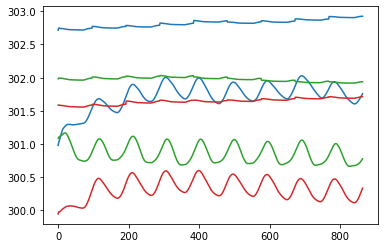

In [101]:
plt.plot(BARPA_T[:,0].data.mean(axis=(1,2)),c='tab:blue')
plt.plot(BARPA_TA[:,0].data.mean(axis=(1,2)),c='tab:green')
plt.plot(BARPA_T10[:,0].data.mean(axis=(1,2)),c='tab:red')
plt.plot(BARPA_SST[:].data.mean(axis=(1,2)),c='tab:blue')
plt.plot(BARPA_SSTA[:].data.mean(axis=(1,2)),c='tab:green')
plt.plot(BARPA_SST10[:].data.mean(axis=(1,2)),c='tab:red')
#plt.plot(CMIP_N[1][:4,0].data.mean(axis=(1,2)))

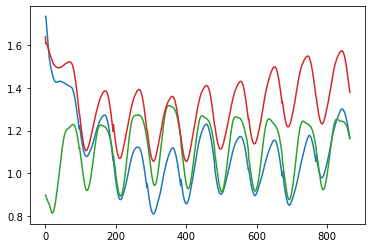

In [103]:
plt.plot(-1*BARPA_T[:,0].data.mean(axis=(1,2))+BARPA_SST.data.mean(axis=(1,2)),c='tab:blue')
plt.plot(-1*BARPA_TA[:,0].data.mean(axis=(1,2))+BARPA_SSTA.data.mean(axis=(1,2)),c='tab:green')
plt.plot(-1*BARPA_T10[:,0].data.mean(axis=(1,2))+BARPA_SST10.data.mean(axis=(1,2)),c='tab:red')


In [13]:
CMIP_N = iris.load("/g/data/oi10/replicas/CMIP6/CMIP/NCC/NorESM2-MM/historical/r1i1p1f1/6hrLev/ta/gn/v20191108/ta*2010*.nc",cx&cy&ct)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ta'
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:1205: UserWarning: Ignoring formula terms variable 'ps' referenced by data variable 'b_bnds' via variable 'lev': Dimensions ('time', 'lat', 'lon') do not span ('lev', 'bnds')
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:1205: UserWarning: Ignoring formula terms variable 'ps' referenced by data variable 'a_bnds' via variable 'lev': Dimensions ('time', 'lat', 'lon') do not span ('lev', 'bnds')
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/netcdf.py:679: UserWarning: Unable to find coordinate for variable '

In [14]:
CMIP_N[1]

[<iris 'Cube' of vertical coordinate formula term: ps / (Pa) (time: 128; latitude: 44; longitude: 33)>,
<iris 'Cube' of air_temperature / (K) (time: 128; atmosphere_hybrid_sigma_pressure_coordinate: 32; latitude: 44; longitude: 33)>]

In [105]:
cp=iris.Constraint(pressure=950)
BARPA_950 = iris.load("/g/data/tp28/dev/barpa/trials/chs548/cg282_norESM_debug/20140101T0000Z/nc/PRS3H/air_temp*-v1-2014010*",cx&cy)
BARPA_950_10 = iris.load("/g/data/tp28/dev/barpa/trials/eh6215/cg282_NorESM2_2010/20100101T0000Z/nc/PRS3H/air_temp*-v1-2010010*",cx&cy)
BARPA_950A = iris.load("/g/data/tp28/dev/barpa/prod/eh6215/cg282_ACCESS-CM2_ssp370*/20140101T0000Z/nc/PRS3H/air_temp*-v1-2014010*",cx&cy)
iris.util.equalise_attributes(BARPA_950_10)
BARPA_950_10 = BARPA_950_10.concatenate_cube()
iris.util.equalise_attributes(BARPA_950)
BARPA_950 = BARPA_950.concatenate_cube()
iris.util.equalise_attributes(BARPA_950A)
BARPA_950A = BARPA_950A.concatenate_cube()

In [39]:
BARPA_950[0].coord('pressure')

DimCoord(array([ 200.,  300.,  400.,  500.,  600.,  700.,  850.,  925.,  950.,
       1000.]), standard_name=None, units=Unit('hPa'), long_name='pressure', var_name='pressure')

0
1
2
3
4
5
6
7
8
9


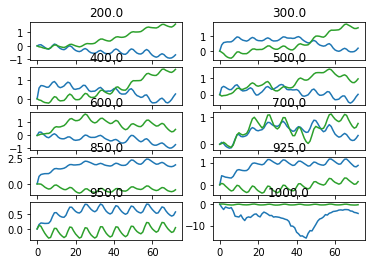

In [53]:
for i in range(10):
    print(i)
    plt.subplot(5,2,i+1)
    plt.title(BARPA_950.coord('pressure').points[i])
    plt.plot(BARPA_950[:,i].data.mean(axis=(1,2))-BARPA_950[0,i].data.mean(),c='tab:blue')
    plt.plot(BARPA_950A[:,i].data.mean(axis=(1,2))-BARPA_950A[0,i].data.mean(),c='tab:green')

0
1
2
3
4
5
6
7
8


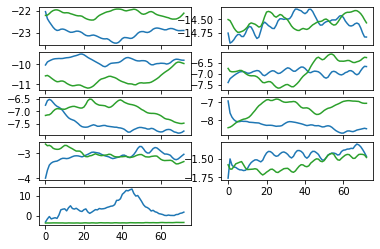

In [106]:
CMIP_T = iris.load("/g/data/oi10/replicas/CMIP6/CMIP/NCC/NorESM2-MM/historical/r1i1p1f1/6hrPlevPt/ta/gn/v20191108/ta_6hrPlevPt_NorESM2-MM_historical_r1i1p1f1_gn_201001010300-201412312100.nc",cx&cy&ct)
ct10 = iris.Constraint(time = lambda t:( t.point.year==2010 and t.point.month==1 ) or( t.point.year ==2009 and t.point.month==12 and t.point.day==31))

CMIP_T10 = iris.load("/g/data/oi10/replicas/CMIP6/CMIP/NCC/NorESM2-MM/historical/r1i1p1f1/6hrPlevPt/ta/gn/v20191108/ta_6hrPlevPt_NorESM2-MM_historical_r1i1p1f1_gn_201001010300-201412312100.nc",cx&cy&ct10)

CMIP_TA = iris.load("/g/data/fs38/publications/CMIP6/CMIP/CSIRO*/ACCESS-CM2/historical/r4i1p1f1/6hrPlevPt/ta/gn/latest/ta_6hrPlevPt_*_gn_2014*.nc",cx&cy&ct)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ta'
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ta'
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ta'
  warnings.warn(


In [83]:
CMIP_T[0].coord('air_pressure')
aw_cn = iris.analysis.cartography.area_weights(CMIP_T[0][:,0])
aw_ca = iris.analysis.cartography.area_weights(CMIP_TA[0][:,0])

In [12]:
iris.util.equalise_attributes(BARPA_Z)
BARPA_Z = BARPA_Z.concatenate_cube()
iris.util.equalise_attributes(BARPA_ZA)
BARPA_ZA = BARPA_ZA.concatenate_cube()

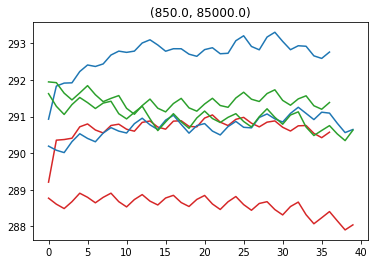

In [108]:
plt.title((BARPA_950.coord('pressure').points[6],CMIP_T[0].coord('air_pressure').points[0]))
plt.plot(BARPA_950[::2,6].data.mean(axis=(1,2)),c='tab:blue')
plt.plot(BARPA_950A[::2,6].data.mean(axis=(1,2)),c='tab:green')
plt.plot(BARPA_950_10[::2,6].data.mean(axis=(1,2)),c='tab:red')
plt.plot(CMIP_T[0][:40,0].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_cn[:40]).data,c='tab:blue')
plt.plot(CMIP_TA[0][:40,0].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_ca[:40]).data,c='tab:green')
plt.plot(CMIP_T10[0][:40,0].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_cn[:40]).data,c='tab:red')

In [93]:
print(CMIP_TA[0].coord('air_pressure'))
print(CMIP_T[0].coord('air_pressure'))


DimCoord(array([85000., 50000., 25000.]), bounds=array([[102500.,  67500.],
       [ 67500.,  37500.],
       [ 37500.,  12500.]]), standard_name='air_pressure', units=Unit('Pa'), long_name='pressure', var_name='plev', attributes={'positive': 'down'})
DimCoord(array([85000., 50000., 25000.]), standard_name='air_pressure', units=Unit('Pa'), long_name='pressure', var_name='plev', attributes={'positive': 'down'})


In [2]:
cx = iris.Constraint(longitude=lambda x: 160<=x<=200)
cy = iris.Constraint(latitude=lambda x: -20<=x<=15)
ct = iris.Constraint(time = lambda t: t.point.year==2014 and t.point.month==1)
CMIP_ZA = iris.load("/g/data/fs38/publications/CMIP6/CMIP/CSIRO*/ACCESS-CM2/historical/r4i1p1f1/day/zg/gn/latest/*_2010*.nc",cx&cy&ct)
CMIP_Z = iris.load("/g/data/oi10/replicas/CMIP6/CMIP/NCC/NorESM2-MM/historical/r1i1p1f1/day/zg/gn/*/*_2010*.nc",cx&cy&ct)
BARPA_ZA = iris.load("/g/data/tp28/dev/barpa/prod/eh6215/cg282_ACCESS-CM2_ssp370*/20140101T0000Z/nc/PRS3H/geop_ht_uv-CMIP6-*-ssp370-r4i1p1f1-barpa_r-v1-201401*",cx&cy)
BARPA_Z = iris.load("/g/data/tp28/dev/barpa/prod/chs548/cg282_NorESM2-MM_ssp370*/20140101T0000Z/nc/PRS3H/geop_ht_uv-CMIP6-*-ssp370-r1i1p1f1-barpa_r-v1-201401*",cx&cy)
print(CMIP_Z[0].coord('air_pressure'),CMIP_ZA[0].coord('air_pressure'))
aw_cn = iris.analysis.cartography.area_weights(CMIP_Z[0][:,0])
aw_ca = iris.analysis.cartography.area_weights(CMIP_ZA[0][:,0])
iris.util.equalise_attributes(BARPA_ZA)
BARPA_ZA = BARPA_ZA.concatenate_cube()
iris.util.equalise_attributes(BARPA_Z)
BARPA_Z = BARPA_Z.concatenate_cube()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'zg'
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'zg'
  warnings.warn(


DimCoord(array([100000.,  85000.,  70000.,  50000.,  25000.,  10000.,   5000.,
         1000.]), standard_name='air_pressure', units=Unit('Pa'), long_name='pressure', var_name='plev', attributes={'positive': 'down'}) DimCoord(array([100000.,  85000.,  70000.,  50000.,  25000.,  10000.,   5000.,
         1000.]), bounds=array([[107500.,  92500.],
       [ 92500.,  77500.],
       [ 77500.,  60000.],
       [ 60000.,  37500.],
       [ 37500.,  17500.],
       [ 17500.,   7500.],
       [  7500.,   3000.],
       [  3000.,  -1000.]]), standard_name='air_pressure', units=Unit('Pa'), long_name='pressure', var_name='plev', attributes={'positive': 'down'})


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


(1450.0, 1520.0)

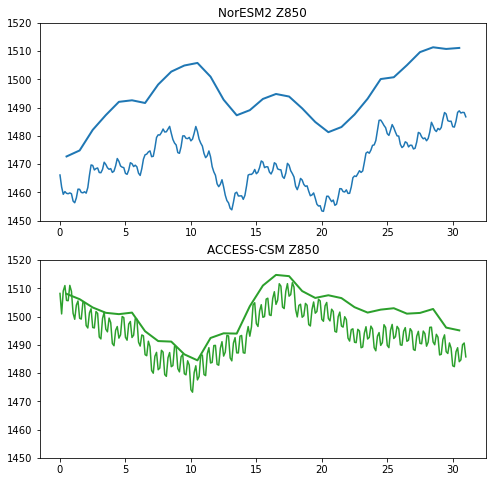

In [5]:
BARPA_Z.data = np.ma.masked_values(BARPA_Z.data,0)
BARPA_ZA.data = np.ma.masked_values(BARPA_ZA.data,0)
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title("NorESM2 Z850")
plt.plot(np.linspace(0,31,249),BARPA_Z[:,6].data.mean(axis=(1,2)),c='tab:blue')
plt.plot(np.arange(0.5,31,1),CMIP_Z[0][:40,1].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_cn[:40]).data,c='tab:blue',lw=2)
plt.ylim(1450,1520)
plt.subplot(212)
plt.title("ACCESS-CSM Z850")
plt.plot(np.arange(0.5,31,1),CMIP_ZA[0][:40,1].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_ca[:40]).data,c='tab:green',lw=2)
plt.plot(np.linspace(0,31,249),BARPA_ZA[:,6].data.mean(axis=(1,2)),c='tab:green')
plt.ylim(1450,1520)


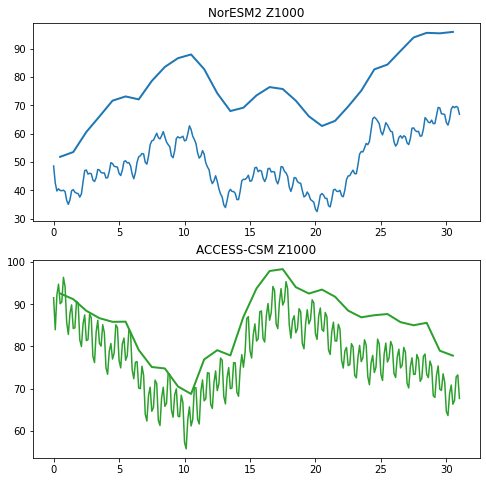

In [6]:

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title("NorESM2 Z1000")
plt.plot(np.linspace(0,31,249),BARPA_Z[:,-1].data.mean(axis=(1,2)),c='tab:blue')
plt.plot(np.arange(0.5,31,1),CMIP_Z[0][:,0].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_cn[:40]).data,c='tab:blue',lw=2)
#plt.ylim(1450,1520)
plt.subplot(212)
plt.title("ACCESS-CM2 Z1000")
plt.plot(np.linspace(0,31,249),BARPA_ZA[:,-1].data.mean(axis=(1,2)),c='tab:green')
plt.plot(np.arange(0.5,31,1),CMIP_ZA[0][:40,0].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_ca[:40]).data,c='tab:green',lw=2)
#plt.ylim(1450,1520)

In [33]:
cx = iris.Constraint(longitude=lambda x: 160<=x<=200)
cy = iris.Constraint(latitude=lambda x: -20<=x<=15)
ct = iris.Constraint(time = lambda t: t.point.year==2014 and t.point.month==1)
CMIP_TA = iris.load("/g/data/fs38/publications/CMIP6/CMIP/CSIRO*/ACCESS-CM2/historical/r4i1p1f1/day/ta/gn/latest/*_2010*.nc",cx&cy&ct)
CMIP_T = iris.load("/g/data/oi10/replicas/CMIP6/CMIP/NCC/NorESM2-MM/historical/r1i1p1f1/day/ta/gn/*/*_2010*.nc",cx&cy&ct)
BARPA_TA = iris.load("/g/data/tp28/dev/barpa/prod/eh6215/cg282_ACCESS-CM2_ssp370*/20140101T0000Z/nc/PRS3H/air_temp_uv-CMIP6-*-ssp370-r4i1p1f1-barpa_r-v1-201401*",cx&cy)
BARPA_T = iris.load("/g/data/tp28/dev/barpa/prod/chs548/cg282_NorESM2-MM_ssp370*/20140101T0000Z/nc/PRS3H/air_temp_uv-CMIP6-*-ssp370-r1i1p1f1-barpa_r-v1-201401*",cx&cy)
print(CMIP_T[0].coord('air_pressure'),CMIP_TA[0].coord('air_pressure'))
aw_cn = iris.analysis.cartography.area_weights(CMIP_T[0][:,0])
aw_ca = iris.analysis.cartography.area_weights(CMIP_TA[0][:,0])
iris.util.equalise_attributes(BARPA_TA)
BARPA_TA = BARPA_TA.concatenate_cube()
iris.util.equalise_attributes(BARPA_T)
BARPA_T = BARPA_T.concatenate_cube()

DimCoord(array([100000.,  85000.,  70000.,  50000.,  25000.,  10000.,   5000.,
         1000.]), standard_name='air_pressure', units=Unit('Pa'), long_name='pressure', var_name='plev', attributes={'positive': 'down'}) DimCoord(array([100000.,  85000.,  70000.,  50000.,  25000.,  10000.,   5000.,
         1000.]), bounds=array([[107500.,  92500.],
       [ 92500.,  77500.],
       [ 77500.,  60000.],
       [ 60000.,  37500.],
       [ 37500.,  17500.],
       [ 17500.,   7500.],
       [  7500.,   3000.],
       [  3000.,  -1000.]]), standard_name='air_pressure', units=Unit('Pa'), long_name='pressure', var_name='plev', attributes={'positive': 'down'})


(289.5, 293.5)

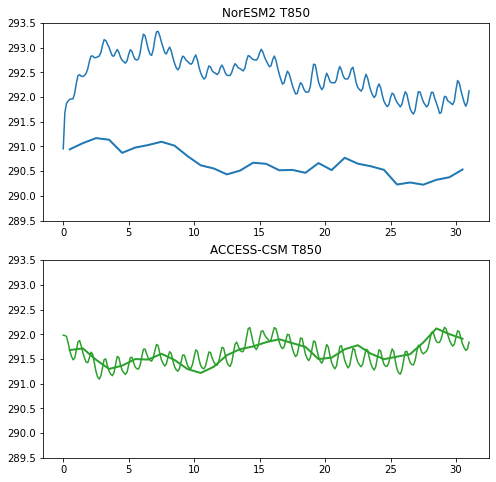

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title("NorESM2 T850")
plt.plot(np.linspace(0,31,249),BARPA_T[:,6].data.mean(axis=(1,2)),c='tab:blue')
plt.plot(np.arange(0.5,31,1),CMIP_T[0][:40,1].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_cn[:40]).data,c='tab:blue',lw=2)
plt.ylim(289.5,293.5)
plt.subplot(212)
plt.title("ACCESS-CSM T850")
plt.plot(np.arange(0.5,31,1),CMIP_TA[0][:40,1].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_ca[:40]).data,c='tab:green',lw=2)
plt.plot(np.linspace(0,31,249),BARPA_TA[:,6].data.mean(axis=(1,2)),c='tab:green')
plt.ylim(289.5,293.5)


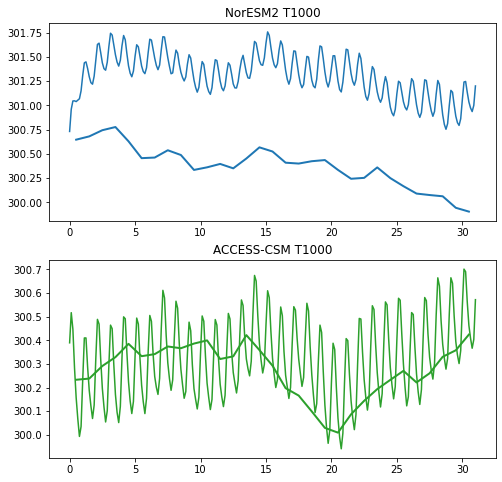

In [36]:
BARPA_T.data = np.ma.masked_values(BARPA_T.data,0)
BARPA_TA.data = np.ma.masked_values(BARPA_TA.data,0)

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title("NorESM2 T1000")
plt.plot(np.linspace(0,31,249),BARPA_T[:,-1].data.mean(axis=(1,2)),c='tab:blue')
plt.plot(np.arange(0.5,31,1),CMIP_T[0][:40,0].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_cn[:40]).data,c='tab:blue',lw=2)
#plt.ylim(289.5,293.5)
plt.subplot(212)
plt.title("ACCESS-CSM T1000")
plt.plot(np.arange(0.5,31,1),CMIP_TA[0][:40,0].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_ca[:40]).data,c='tab:green',lw=2)
plt.plot(np.linspace(0,31,249),BARPA_TA[:,-1].data.mean(axis=(1,2)),c='tab:green')
#plt.ylim(289.5,293.5)

In [31]:
cx = iris.Constraint(longitude=lambda x: 160<=x<=200)
cy = iris.Constraint(latitude=lambda x: -20<=x<=15)
ct = iris.Constraint(time = lambda t: t.point.year==2014 and t.point.month==1)
CMIP_TA = iris.load("/g/data/fs38/publications/CMIP6/CMIP/CSIRO*/ACCESS-CM2/historical/r4i1p1f1/6hrLev/ps/gn/latest/*_2010*.nc",cx&cy&ct)
CMIP_T = iris.load("/g/data/oi10/replicas/CMIP6/CMIP/NCC/NorESM2-MM/historical/r1i1p1f1/6hrLev/ps/gn/*/*_2010*.nc",cx&cy&ct)
BARPA_TA = iris.load("/g/data/tp28/dev/barpa/prod/eh6215/cg282_ACCESS-CM2_ssp370*/20140101T0000Z/nc/SLV1H/sfc_pres-*-ssp370-r4i1p1f1-barpa_r-v1-201401*",cx&cy)
BARPA_T = iris.load("/g/data/tp28/dev/barpa/prod/chs548/cg282_NorESM2-MM_ssp370*/20140101T0000Z/nc/SLV1H/sfc_pres-CMIP6-*-ssp370-r1i1p1f1-barpa_r-v1-201401*",cx&cy)
#print(CMIP_T[0].coord('air_pressure'),CMIP_TA[0].coord('air_pressure'))
aw_cn = iris.analysis.cartography.area_weights(CMIP_T[0][:])
aw_ca = iris.analysis.cartography.area_weights(CMIP_TA[0][:])
iris.util.equalise_attributes(BARPA_TA)
BARPA_TA = BARPA_TA.concatenate_cube()
iris.util.equalise_attributes(BARPA_T)
BARPA_T = BARPA_T.concatenate_cube()

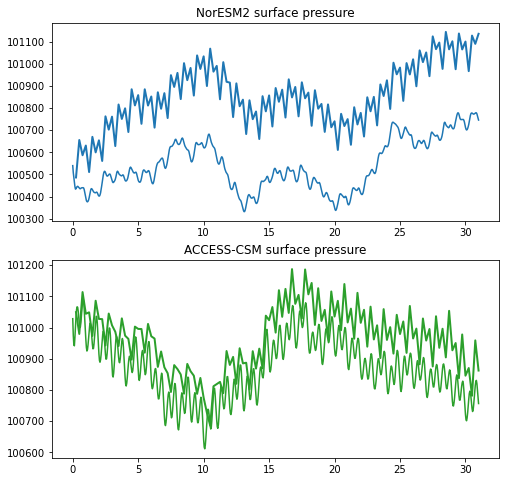

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title("NorESM2 surface pressure")
plt.plot(np.linspace(0,31,745),BARPA_T[:].data.mean(axis=(1,2)),c='tab:blue')
plt.plot(np.linspace(0.25,31,124),CMIP_T[0][:].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_cn[:]).data,c='tab:blue',lw=2)
plt.subplot(212)
plt.title("ACCESS-CSM surface pressure")
plt.plot(np.linspace(0,31,745),BARPA_TA[:].data.mean(axis=(1,2)),c='tab:green')
plt.plot(np.linspace(0.25,31,124),CMIP_TA[0][:].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_ca[:]).data,c='tab:green',lw=2)


In [52]:
CMIP_T

[<iris 'Cube' of air_temperature / (K) (time: 31; air_pressure: 8; latitude: 44; longitude: 33)>]

In [7]:
cx = iris.Constraint(longitude=lambda x: 160<=x<=200)
cy = iris.Constraint(latitude=lambda x: -20<=x<=15)
ct = iris.Constraint(time = lambda t: t.point.year==2014 and t.point.month==1)
CMIP_HA = iris.load("/g/data/fs38/publications/CMIP6/CMIP/CSIRO*/ACCESS-CM2/historical/r4i1p1f1/day/hus/gn/latest/*_2010*.nc",cx&cy&ct)
CMIP_H = iris.load("/g/data/oi10/replicas/CMIP6/CMIP/NCC/NorESM2-MM/historical/r1i1p1f1/day/hus/gn/*/*_2010*.nc",cx&cy&ct)
BARPA_HA = iris.load("/g/data/tp28/dev/barpa/prod/eh6215/cg282_ACCESS-CM2_ssp370*/20140101T0000Z/nc/PRS3H/spec_hum_uv-CMIP6-*-ssp370-r4i1p1f1-barpa_r-v1-201401*",cx&cy)
BARPA_H = iris.load("/g/data/tp28/dev/barpa/prod/chs548/cg282_NorESM2-MM_ssp370*/20140101T0000Z/nc/PRS3H/spec_hum_uv-CMIP6-*-ssp370-r1i1p1f1-barpa_r-v1-201401*",cx&cy)
print(CMIP_H[0].coord('air_pressure'),CMIP_HA[0].coord('air_pressure'))
aw_cn = iris.analysis.cartography.area_weights(CMIP_H[0][:,0])
aw_ca = iris.analysis.cartography.area_weights(CMIP_HA[0][:,0])
iris.util.equalise_attributes(BARPA_HA)
BARPA_HA = BARPA_HA.concatenate_cube()
iris.util.equalise_attributes(BARPA_H)
BARPA_H = BARPA_H.concatenate_cube()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'hus'
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'hus'
  warnings.warn(


DimCoord(array([100000.,  85000.,  70000.,  50000.,  25000.,  10000.,   5000.,
         1000.]), standard_name='air_pressure', units=Unit('Pa'), long_name='pressure', var_name='plev', attributes={'positive': 'down'}) DimCoord(array([100000.,  85000.,  70000.,  50000.,  25000.,  10000.,   5000.,
         1000.]), bounds=array([[107500.,  92500.],
       [ 92500.,  77500.],
       [ 77500.,  60000.],
       [ 60000.,  37500.],
       [ 37500.,  17500.],
       [ 17500.,   7500.],
       [  7500.,   3000.],
       [  3000.,  -1000.]]), standard_name='air_pressure', units=Unit('Pa'), long_name='pressure', var_name='plev', attributes={'positive': 'down'})


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


(0.008, 0.014)

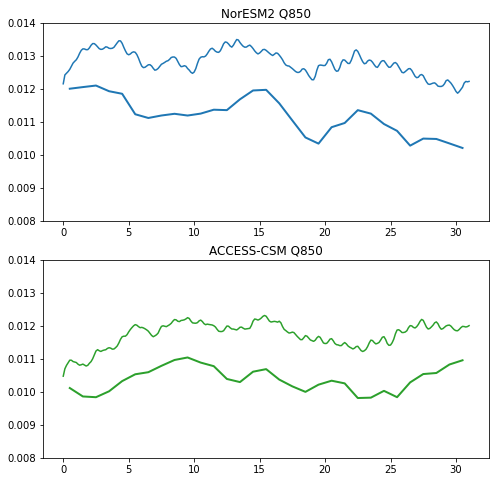

In [67]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title("NorESM2 Q850")
plt.plot(np.linspace(0,31,249),BARPA_H[:,6].data.mean(axis=(1,2)),c='tab:blue')
plt.plot(np.arange(0.5,31,1),CMIP_H[0][:40,1].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_cn[:40]).data,c='tab:blue',lw=2)
plt.ylim(0.008,0.014)
plt.subplot(212)
plt.title("ACCESS-CSM Q850")
plt.plot(np.arange(0.5,31,1),CMIP_HA[0][:40,1].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_ca[:40]).data,c='tab:green',lw=2)
plt.plot(np.linspace(0,31,249),BARPA_HA[:,6].data.mean(axis=(1,2)),c='tab:green')
plt.ylim(0.008,0.014)

In [2]:
cx = iris.Constraint(longitude=lambda x: 160<=x<=200)
cy = iris.Constraint(latitude=lambda x: -20<=x<=20)
ct = iris.Constraint(time = lambda t: t.point.year==2014 and t.point.month==1)
#CMIP_SSTA = iris.load("/g/data/fs38/publications/CMIP6/CMIP/CSIRO*/ACCESS-CM2/historical/r4i1p1f1/Oday/tos/gn/latest/*_2010*.nc",cx&cy&ct)
CMIP_SST = iris.load("/g/data/oi10/replicas/CMIP6/CMIP/NCC/NorESM2-MM/historical/r1i1p1f1/6hrPlevPt/ts/gn/*/*_2010*.nc",cx&cy&ct)
BARPA_SSTA = iris.load("/g/data/tp28/dev/barpa/prod/eh6215/cg282_ACCESS-CM2_ssp370*/20140101T0000Z/nc/SLV15M/sfc_temp-CMIP6-*-ssp370-r4i1p1f1-barpa_r-v1-201401*",cx&cy)
BARPA_SST = iris.load("/g/data/tp28/dev/barpa/prod/chs548/cg282_NorESM2-MM_ssp370*/20140101T0000Z/nc/SLV15M/sfc_temp-CMIP6-*-ssp370-r1i1p1f1-barpa_r-v1-201401*",cx&cy)

In [16]:
import warnings
def fxn():
    warnings.warn("user", UserWarning)

warnings.simplefilter("ignore")
fxn()
ANCIL = iris.load("/short/tp28/eh6215/sst/qrclim.sst",cx&cy)

In [9]:
aw_cn = iris.analysis.cartography.area_weights(CMIP_SST[0][:])
#aw_ca = iris.analysis.cartography.area_weights(CMIP_SSTA[0][:,0])
iris.util.equalise_attributes(BARPA_SSTA)
BARPA_SSTA = BARPA_SSTA.concatenate_cube()
iris.util.equalise_attributes(BARPA_SST)
BARPA_SST = BARPA_SST.concatenate_cube()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


TypeError: 'Cube' object is not iterable

(0.008, 0.014)

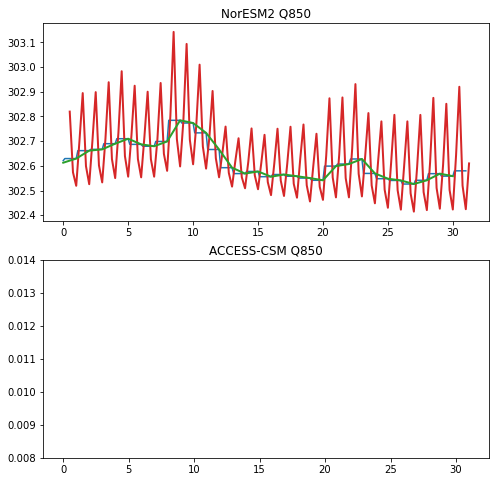

In [30]:
cy2=iris.Constraint(latitude=lambda y:-5<=y<=15)
aw_cn = iris.analysis.cartography.area_weights(CMIP_SST[0][:].extract(cy2))

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title("NorESM2 Q850")
plt.plot(np.linspace(0,31,249),BARPA_SST[::12].extract(cy2).data.mean(axis=(1,2)),c='tab:blue')
plt.plot(np.arange(0.5,31.5,0.25),CMIP_SST[0][:].extract(cy2).collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_cn[:]).data,c='tab:red',lw=2)
plt.plot(ANCIL[1][:31].extract(cy2).collapsed(['longitude','latitude'],iris.analysis.MEAN).data,c='tab:green',lw=2)

#plt.ylim(0.008,0.014)
plt.subplot(212)
plt.title("ACCESS-CSM Q850")
#plt.plot(np.arange(0.5,31,1),CMIP_SSTA[0][:40,1].collapsed(['longitude','latitude'],iris.analysis.MEAN,weights=aw_ca[:40]).data,c='tab:green',lw=2)
plt.plot(np.linspace(0,31,249),BARPA_SSTA[::12].extract(cy2).data.mean(axis=(1,2)),c='tab:green')
plt.ylim(0.008,0.014)

In [5]:
import numpy as np

In [7]:
2977/249

11.95582329317269

In [17]:
ANCIL

Sea Ice Area Fraction (1),time,latitude,longitude
Shape,366,229,259
Dimension coordinates,,,
time,x,-,-
latitude,-,x,-
longitude,-,-,x
Attributes,,,STASH m01s00i031
Surface Temperature (K),time,latitude,longitude
Shape,366,229,259
Dimension coordinates,,,
time,x,-,-


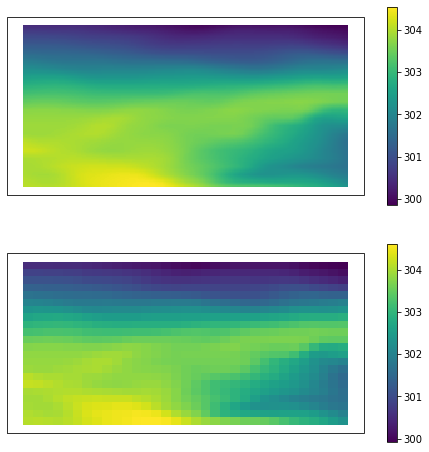

In [25]:
import iris.plot
import cartopy.crs as ccrs
cy2=iris.Constraint(latitude=lambda y:-5<=y<=15)

plt.figure(figsize=(8,8))
plt.subplot(211,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(ANCIL[1][:31].extract(cy2).collapsed('time',iris.analysis.MEAN))
plt.colorbar()
plt.subplot(212,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(CMIP_SST[0][:].extract(cy2).collapsed('time',iris.analysis.MEAN))
plt.colorbar()


In [13]:
from iris.analysis.maths import multiply as mul
def calc_slope(y):
    n=y.shape[0]
    x = np.arange(1,n+1)
    xx = iris.coords.AuxCoord(x)
    xx.units = 1
    out = (n*mul(y,xx,0).collapsed('time',iris.analysis.SUM) \
        -y.collapsed('time',iris.analysis.SUM)*x.sum()) \
        /(n*(x**2).sum() - x.sum()**2)
    return out


In [21]:
BARPA_T = iris.load("/g/data/tp28/dev/barpa/prod/chs548/cg282_NorESM2-MM_ssp370*/20140101T0000Z/nc/PRS3H/air_temp_uv-CMIP6-*-ssp370-r1i1p1f1-barpa_r-v1-2014010*")
iris.util.equalise_attributes(BARPA_T)
BARPA_T = BARPA_T.concatenate_cube()
BARPA_TA = iris.load("/g/data/tp28/dev/barpa/prod/eh6215/cg282_ACCESS-CM2_ssp370*/20140101T0000Z/nc/PRS3H/air_temp_uv-CMIP6-*-ssp370-r4i1p1f1-barpa_r-v1-2014010*")
iris.util.equalise_attributes(BARPA_TA)
BARPA_TA= BARPA_TA.concatenate_cube()

In [31]:
delta1 = calc_slope(BARPA_T[:16])
delta2 = calc_slope(BARPA_TA[:16])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_period'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_period'.
  warnings.warn(msg.for

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


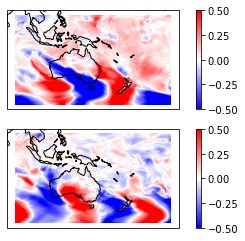

In [32]:
import cartopy.crs as ccrs
import iris.plot as iplt
ax=plt.subplot(211,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(delta1[6],vmin=-0.5,vmax=0.5,cmap='bwr')
ax.coastlines()
plt.colorbar()
ax=plt.subplot(212,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(delta2[6],vmin=-0.5,vmax=0.5,cmap='bwr')
plt.colorbar()
ax.coastlines()